# Import libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-05-28 14:48:40.145850: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-28 14:48:41.597465: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import pathlib

# Load image paths

In [3]:
dataset_path = '/mnt/c/Achintha/Uni/Level 04/FYP/imgs'

In [4]:
data_dir = pathlib.Path(dataset_path)
data_dir

PosixPath('/mnt/c/Achintha/Uni/Level 04/FYP/imgs')

In [5]:
train_ds,val_ds =  keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="both",
    seed=123,
    )

Found 3385 files belonging to 2 classes.
Using 2708 files for training.
Using 677 files for validation.


2024-05-28 14:51:30.916611: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-28 14:51:31.156251: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-28 14:51:31.156335: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-28 14:51:31.163866: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-28 14:51:31.163959: I external/local_xla/xla/stream_executor

In [6]:
class_names = train_ds.class_names
class_names

['Blight', 'Gray_Leaf_Spot']

2024-05-28 14:51:39.828731: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


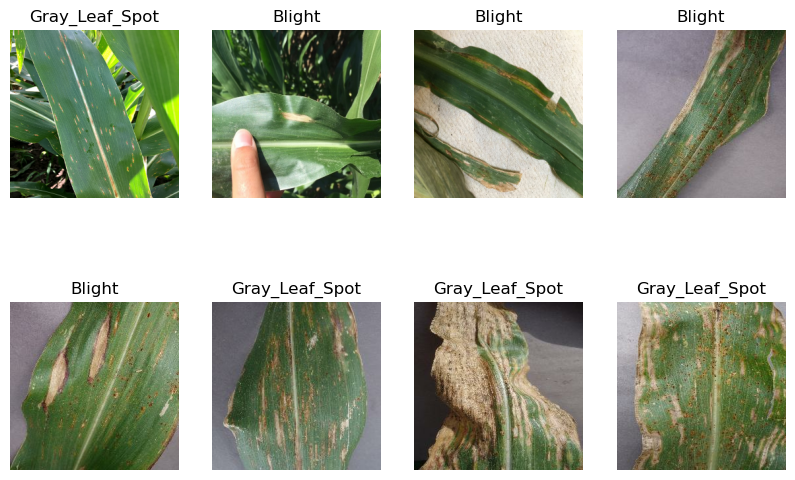

In [7]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# train/test split

In [9]:
resize_and_rescale = keras.Sequential([
  keras.layers.Resizing(256, 256),
  keras.layers.Rescaling(1./255),
])

In [10]:
no_of_classes = 2

In [11]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3

In [12]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

In [13]:
model = Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(no_of_classes, activation='softmax')
])

model.build(input_shape=input_shape)

/home/achintha/anaconda3/envs/myenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 2)                │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,682 (717.51 KB)

 Trainable params: 183,682 (717.51 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [16]:
early_stopping = tf.keras.callbacks.EarlyStopping(
                                                    monitor='val_loss',
                                                    patience=20,
                                                    restore_best_weights=True
                                                    )
epochs=150

# With GPU

In [17]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [18]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        batch_size=BATCH_SIZE,
        validation_data=val_ds,
        verbose=1,
        epochs=epochs,
        callbacks=[early_stopping]
    )

Epoch 1/150


/home/achintha/anaconda3/envs/myenv/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
I0000 00:00:1716888393.180169    4186 service.cc:145] XLA service 0x7f6e1c006250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716888393.180267    4186 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-05-28 14:56:33.408203: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-28 14:56:33.815494: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900
2024-05-28 14:56:39.221873: W external/local_tsl/tsl/framewor

 2/85 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.3359 - loss: 0.7155  

I0000 00:00:1716888403.612239    4186 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.6424 - loss: 0.6545

2024-05-28 14:56:57.078988: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.65GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-28 14:56:57.237271: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.65GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


85/85 ━━━━━━━━━━━━━━━━━━━━ 34s 255ms/step - accuracy: 0.6432 - loss: 0.6541 - val_accuracy: 0.6632 - val_loss: 0.6425
Epoch 2/150
85/85 ━━━━━━━━━━━━━━━━━━━━ 16s 193ms/step - accuracy: 0.6671 - loss: 0.6390 - val_accuracy: 0.6677 - val_loss: 0.5774
Epoch 3/150
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.7188 - loss: 0.5422 - val_accuracy: 0.7770 - val_loss: 0.4504
Epoch 4/150
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.8013 - loss: 0.4148 - val_accuracy: 0.8198 - val_loss: 0.3910
Epoch 5/150
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.8362 - loss: 0.3625 - val_accuracy: 0.8287 - val_loss: 0.4013
Epoch 6/150
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.8697 - loss: 0.3217 - val_accuracy: 0.8567 - val_loss: 0.3333
Epoch 7/150
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.8719 - loss: 0.2949 - val_accuracy: 0.8597 - val_loss: 0.3304
Epoch 8/150
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.8906 - loss: 0.2550 - val_accuracy: 0.8774 -

In [19]:
model_path='/mnt/c/Users/achin/Desktop/python_notebooks/FYP Code/2024-04-17_CNN_model/cnn_model'

In [20]:
#save the model
tf.keras.models.save_model(model,model_path+'/corn-disease-classifier.hdf5')